The dataset for this competition (both train and test) was generated from a deep learning model trained on the Obesity or CVD risk dataset. Feature distributions are close to, but not exactly the same, as the original. Feel free to use the original dataset as part of this competition, both to explore differences as well as to see whether incorporating the original in training improves model performance.

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [109]:
train_data = pd.read_csv('/content/drive/MyDrive/Multi-Class Prediction of Obesity Risk/Multi-Class Prediction of Obesity Risk/train.csv')
test_data =pd.read_csv('/content/drive/MyDrive/Multi-Class Prediction of Obesity Risk/Multi-Class Prediction of Obesity Risk/test.csv')

In [110]:
df = train_data.copy()
df#created a copy from the training data and stored it in df

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II


In [111]:
from sklearn.model_selection import train_test_split
#seperating the data and target
X = df.drop(['NObeyesdad'],axis = 1)
y = df['NObeyesdad']
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size = 0.3,random_state =42)


In [112]:
#lets get the names of the categorical data
# Assuming df is your DataFrame
cat_labels = X_train.columns[X_train.apply(lambda x: x.dtype == 'object')]
cat_labels

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS'],
      dtype='object')

In [113]:
# Assuming 'df' is your pandas DataFrame
cardinalities = {}

# Iterate through each column in the DataFrame
for column in df.columns:
    # Check if the column is categorical
    if df[column].dtype == 'object':
        # Calculate the cardinality and add it to the dictionary
        cardinalities[column] = df[column].nunique()

# Print the dictionary
# Print the cardinalities of categorical columns
print("Cardinalities of categorical columns:")
for column, cardinality in cardinalities.items():
    print(f"{column}: {cardinality}")



Cardinalities of categorical columns:
Gender: 2
family_history_with_overweight: 2
FAVC: 2
CAEC: 4
SMOKE: 2
SCC: 2
CALC: 3
MTRANS: 5
NObeyesdad: 7


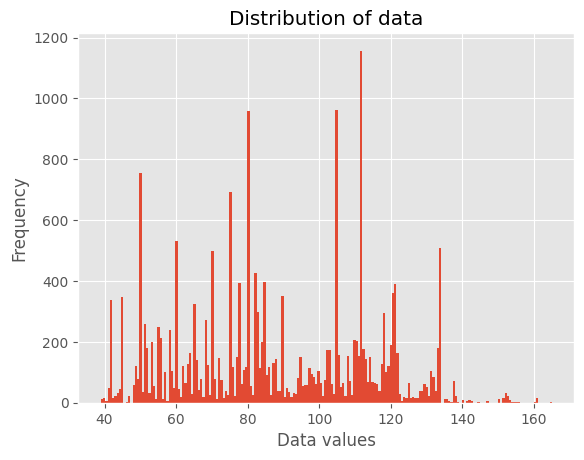

In [114]:
plt.hist(df['Weight'],bins = 200)
plt.xlabel('Data values')
plt.ylabel('Frequency')
plt.title('Distribution of data')
plt.grid(True)

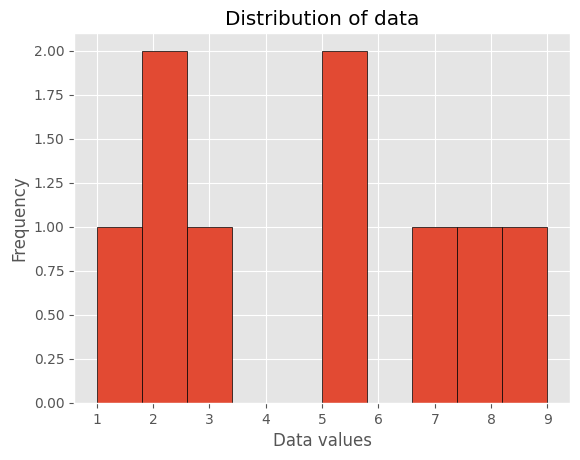

In [115]:
# Sample data (replace with your actual data)
data = [2, 5, 7, 2, 8, 1, 3, 5, 9]

# Create the histogram
plt.hist(data, bins=10, edgecolor='black')  # Adjust 'bins' for the number of bars

# Customize the plot (optional)
plt.xlabel('Data values')
plt.ylabel('Frequency')
plt.title('Distribution of data')
plt.grid(True)

# Show the plot
plt.show()

In [116]:
#sns.pairplot(df,hue = 'NObeyesdad')

In [117]:
df.size

373644

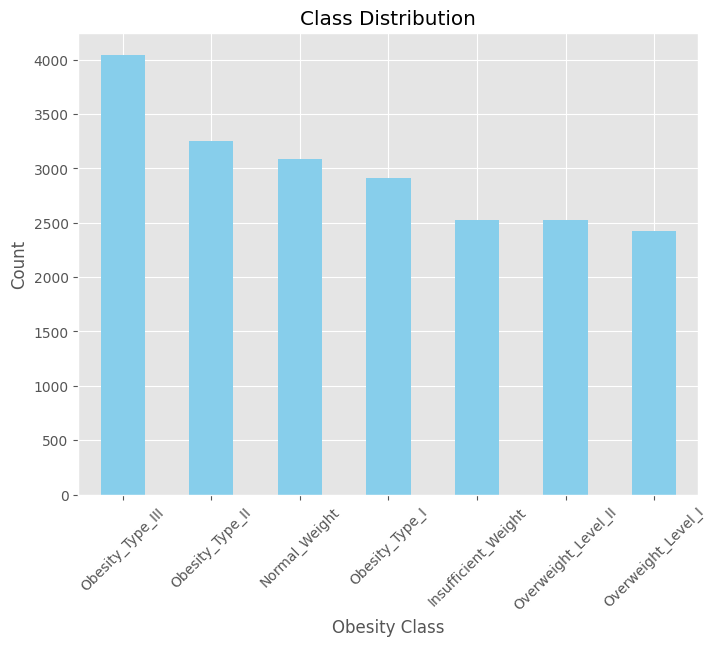

In [118]:
class_distribution= df['NObeyesdad'].value_counts()
plt.figure(figsize=(8, 6))
class_distribution.plot(kind='bar', color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Obesity Class')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [119]:
df.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


(array([3.339e+03, 8.935e+03, 5.148e+03, 1.570e+03, 9.080e+02, 6.810e+02,
        9.700e+01, 1.300e+01, 6.500e+01, 2.000e+00]),
 array([14. , 18.7, 23.4, 28.1, 32.8, 37.5, 42.2, 46.9, 51.6, 56.3, 61. ]),
 <BarContainer object of 10 artists>)

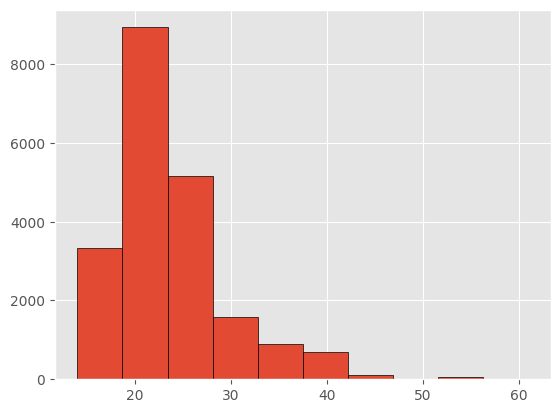

In [120]:
plt.hist(df['Age'], bins=10, edgecolor='black')  # Adjust 'bins' for the number of bars

In [121]:
df[df['Age']>50]['NObeyesdad'].value_counts()

Overweight_Level_II    51
Overweight_Level_I     12
Obesity_Type_I          3
Normal_Weight           1
Obesity_Type_II         1
Name: NObeyesdad, dtype: int64

In [122]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [123]:
import pandas as pd

# Assuming your dataset is stored in a DataFrame called df

# Find numerical columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Find categorical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()


In [124]:
numerical_transformer = SimpleImputer(strategy = 'median')
categorical_transformer = Pipeline(steps = [
    ('imputer',SimpleImputer(strategy ='most_frequent')),
    ('ohe',OneHotEncoder(handle_unknown = 'ignore'))
])
preprocessing = ColumnTransformer (transformers=[
    ('num',numerical_transformer,numerical_cols),
    ('cat',categorical_transformer,categorical_cols)
])

In [131]:
from sklearn.ensemble import RandomForestClassifier
my_pipeline = Pipeline(steps = [
    ('Processing',preprocessing),
    ('clf',RandomForestClassifier(n_estimators=150))
])

In [132]:
my_pipeline.fit(X_train,y_train)

Pipeline(steps=[('Processing',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='median'),
                                                  ['id', 'Age', 'Height',
                                                   'Weight', 'FCVC', 'NCP',
                                                   'CH2O', 'FAF', 'TUE']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender',
                                                   'family_history_with_overweight',
                                                   'FAVC', 'CAEC', 'SMOKE',
                                                   'SCC', 'CALC',
                                                   'MTRANS'])])),
                ('clf', RandomForestClassifier(n_estimators=150))])

In [133]:
prediction = my_pipeline.predict(X_valid)

In [134]:
from sklearn.metrics import accuracy_score
print('accuracy score is ',accuracy_score(y_valid,prediction))

accuracy score is  0.8859987154784843


In [153]:
from sklearn.model_selection import cross_val_score
# Perform k-fold cross-validation
k = 12 # Number of folds
cv_scores = cross_val_score(my_pipeline, X_train, y_train, cv=k, scoring='accuracy')

# Calculate and print the mean accuracy and standard deviation of the cross-validation scores
print("Mean Accuracy:", cv_scores.mean())
print("Standard Deviation of Accuracy:", cv_scores.std())


Mean Accuracy: 0.8925002217960704
Standard Deviation of Accuracy: 0.010637348669700715


In [152]:
import pandas as pd

# Assuming my_pipeline is already trained and test data is available
predictions = my_pipeline.predict(test_data)

# Create a DataFrame with predictions and test indices
submission_df = pd.DataFrame({'id':test_data.id,'NObeyesdad':predictions})

# Save the DataFrame to a CSV file
submission_df.to_csv('submission.csv',index=False)


In [151]:
submission_df

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III
...,...,...
13835,34593,Overweight_Level_II
13836,34594,Overweight_Level_I
13837,34595,Insufficient_Weight
13838,34596,Normal_Weight
